# Comparison of Three Methods to Clear Sponge-Wedge Chips

## Summary Graphs

### Data

In [1]:
data_csv_filename = 'method_comparison_data.xlsx'

In [2]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [3]:
import os
from pathlib import Path
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [5]:
print(data_path)

/home/mkrause/data/biofuel-cell/method_comparison_data.xlsx


#### Read all sheets of the Excel file

In [6]:
try:
    xlsx = pd.read_excel(data_path, sheet_name=None)
    print(xlsx.keys())
except FileNotFoundError as e:
    print(f'Error: {e}')
    path = Path(data_path)
    if not _Utility.path_exists(path):
        print(f"path {path} doesn't exist")
    if not _Utility.dir_exists(path):
        print(f"directory 'data' doesn't exist")
    if not _Utility.file_exists(path):
        print(f"file {data_csv_filename} doesn't exist")

dict_keys(['Sheet1'])


Add a 'Sheet' column to each dataframe. This is necessary because the sheet names are not a column in the Excel file.

In [7]:
# for sheet_name in xlsx.keys():
#     xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [8]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys())

### Define constants for the analysis

In [9]:
col_data = '% cleared'
col_category = 'experiment ID'
col_iteration = 'iteration'
col_chip_id = 'chip ID'
col_section = 'chip side(f or b)'
experiments = (1, 2, 3)
col_frac_not_cleared = 'number of channels not cleared'
fig_png = 'png'
fig_svg = 'svg'
title = 'Comparison of Clearance Methods'
# df[df[col_category] == 3]

Cast all entries in the column holding the chip IDs as strings.

In [10]:
df[col_chip_id] = df[col_chip_id].astype(str)

Make sure that our dataframe has no NANs in the `% cleared` column

In [11]:
df = df[df[col_frac_not_cleared] > 1.0]
df

,experiment ID,image filename,chip ID,chip side(f or b),iteration,number of channels not cleared,% cleared
0,3,IMG_7478,N-1,front,1,36,43.7500
1,3,IMG_7479,N-1,back,1,28,56.2500
2,3,IMG_7480,N-2,front,1,20,68.7500
3,3,IMG_7481,N-2,back,1,32,50.0000
4,3,IMG_7482,N-3,front,1,24,62.5000
5,3,IMG_7483,N-3,back,1,30,53.1250
6,3,IMG_7533,N-1,front,2,13,79.6875
7,3,IMG_7534,N-1,back,2,8,87.5000
8,3,IMG_7531,N-2,front,2,8,87.5000
9,3,IMG_7530,N-2,back,2,22,65.6250


## Plot all data

### Plot individual data by experiment ID and iteration

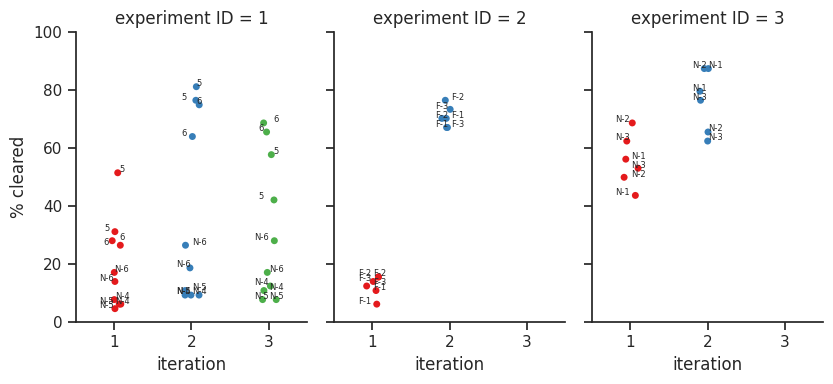

In [109]:
palette = "Set1"
# sns.set(style="ticks", palette=palette)
g = sns.catplot(
    data=df,
    x=col_iteration,
    y=col_data,
    col=col_category,
    hue=col_iteration,
    kind='strip',  # show individual data points
    dodge=False,
    height=4,
    aspect=0.7,
    legend=False,
    palette=palette
)

df[df[col_category] == 1]

for ax in g.axes.flat:
    category: str = ax.get_title().split(' = ')[1]
    category_df = df[df[col_category] == int(category)]
    for index, row in category_df.iterrows():
        if index % 2 == 0:
            x_value = row[col_iteration] - 1.1
        else: 
            x_value = row[col_iteration] - 0.9
        ax.text(
            x=x_value,
            y=row[col_data] + 0.2,
            s=row[col_chip_id],
            ha='center',
            fontsize=6
        )

plt.ylim(0, 100)
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_svg}')
plt.show()

### Summary statistics of clearance after each iteration in each experiment ID

In [110]:
def get_summary(df: pd.DataFrame, verbose: bool=False) -> pd.DataFrame:
    """Return summary dataframe of input dataframe"""
    summary: pd.DataFrame = df.groupby([col_category, col_iteration])[col_data].agg(['mean', 'std', 'count']).reset_index()
    if verbose:
        print(summary)
    return summary
    
summary: pd.DataFrame = get_summary(df=df, verbose=True)

   experiment ID  iteration       mean        std  count
0              1          1  19.375000  15.026741     10
1              1          2  38.125000  31.793878     10
2              1          3  31.875000  24.674531     10
3              2          1  12.500000   3.563048      6
4              2          2  70.833333   3.653266      6
5              3          1  55.729167   8.930431      6
6              3          2  76.562500  10.643366      6


### Boxplot of Summary Data

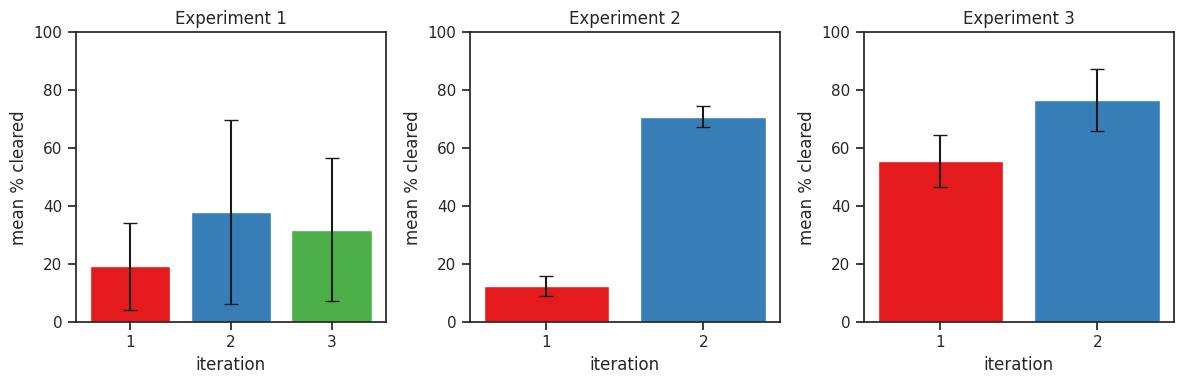

In [111]:
# Group data by experiment_ID and iteration.
grouped = summary.groupby([col_category, col_iteration])

sns.set(style="ticks", palette=palette)

# Create subplots.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Iterate over groups and plot.
for (experiment_id, iteration), group in grouped:
    ax = axes[experiment_id - 1]
    ax.bar(group['iteration'], group['mean'], yerr=group['std'], capsize=5)
    ax.set_title(f'Experiment {experiment_id}')
    ax.set_xlabel('iteration')
    ax.set_ylabel(f'mean {col_data}')

    # Set y-axis limits for all subplots.
    ax.set_ylim(0, 100)
    
# Set appropriate x-axis labels corresponding to the number of means in each subplot.
num_bars = 0
for (experiment_id, iteration), group in grouped:
    ax = axes[experiment_id - 1]
    if num_bars < group['iteration'].unique()[0]:
        num_bars = group['iteration'].unique()[0]
    num_bars_range: range= range(1, num_bars + 1)
    ax.set_xticks(num_bars_range)
    ax.set_xticklabels(num_bars_range)
    num_bars = 0

plt.tight_layout()
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_summary_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_summary_v1.{fig_svg}')
plt.show()